In [1]:
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;
%matplotlib inline

We will be working on an item-similarity (content) based recommendor system 

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
# tab separated file: therefore sep = '\t'
df = pd.read_csv('u.data', sep= '\t', names = column_names)

In [4]:
df.head()

user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742

In [5]:
movie_titles = pd.read_csv('Movie_id_titles')

In [6]:
movie_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

We want the above dataframes so that the dataframe above uses item_id from the one below to crossreference and add the titles to the above/new database 

In [7]:
df = pd.merge(df, movie_titles, on= 'item_id')

In [57]:
df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

In [71]:
df[df['title'] == '2001: A Space Odyssey (1968)']

user_id  item_id  rating  timestamp                         title
20882       82      135       3  878769629  2001: A Space Odyssey (1968)
20883      160      135       4  876860807  2001: A Space Odyssey (1968)
20884       95      135       3  879197562  2001: A Space Odyssey (1968)
20885      293      135       5  888905550  2001: A Space Odyssey (1968)
20886      187      135       4  879465653  2001: A Space Odyssey (1968)
...        ...      ...     ...        ...                           ...
21136       60      135       5  883327087  2001: A Space Odyssey (1968)
21137      437      135       4  880140101  2001: A Space Odyssey (1968)
21138      928      135       4  880936884  2001: A Space Odyssey (1968)
21139      738      135       5  892844111  2001: A Space Odyssey (1968)
21140      653      135       5  878866755  2001: A Space Odyssey (1968)

[259 rows x 5 columns]

# Exploratory Data Analysis

In [9]:
sns.set_style ('darkgrid');

let's create a dataframe which is ratings based; with average and number of ratings being the weights

In [10]:
# to get average rating values per title
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [11]:
# to get highest rated titles
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [12]:
# to get no. of ratings
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [13]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [14]:
ratings.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [15]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [16]:
ratings.head()

rating  num of ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

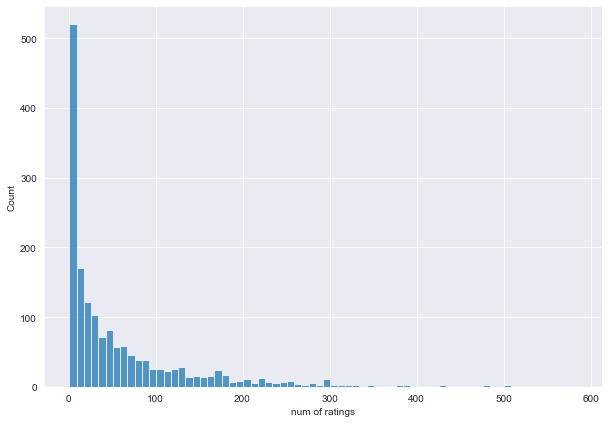

In [17]:
plt.figure(figsize = (10, 7))
sns.histplot(ratings['num of ratings'], bins = 70)

Most movies only have 0 or 1 rating!!!

<AxesSubplot:xlabel='rating', ylabel='Count'>

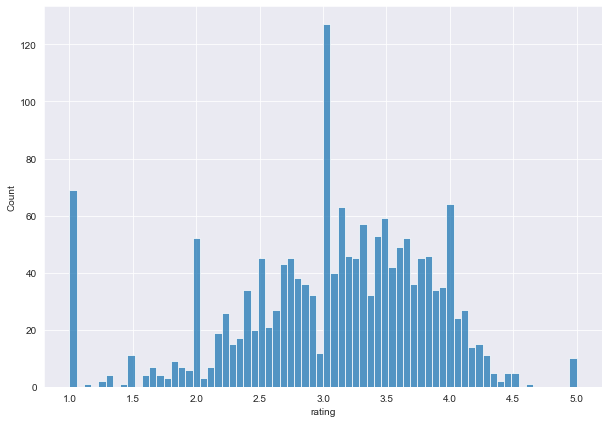

In [18]:
plt.figure(figsize = (10, 7))
sns.histplot(ratings['rating'], bins = 70)

Looks like a normal distribution! Most movies have a 3.0 rating which is understandable

Let's look at the average rating and no. of ratings using a jointplot

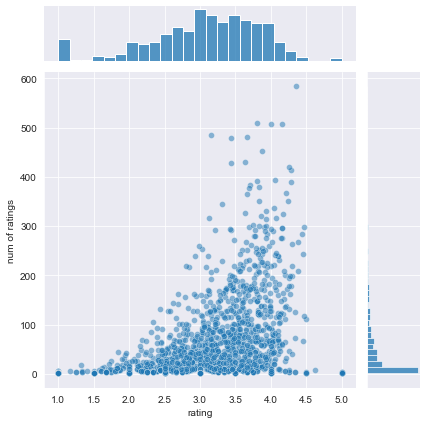

In [19]:
# IMPORTANT

sns.jointplot(x = 'rating', y = 'num of ratings', data = ratings, alpha = 0.5)

More number of ratings seem to be there for better movies. Which makes sense since the most marketed movies also have the most associated budget in total as well as for marketing; therefore we get the above graph.

## Now, we create our recommender system

In [20]:
df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

<strong>Critical features:</strong> user_id, rating and title

Let's now create a pivot table of this

In [62]:
movMat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [22]:
movMat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id  ...                                                 
0        ...                 NaN                       NaN   
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   

title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
user_id                                                                      
0                        NaN                        NaN                NaN   
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   

title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user_id                                                                
0                         NaN                                    NaN   
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   

title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
user_id                                                                        
0                            NaN      NaN                                 NaN  
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                    

<strong>NOTE:</strong> Most null values are here since most people have not seen most of the movies

In [63]:
ratings.sort_values('num of ratings', ascending = False).head(10)

rating  num of ratings
title                                                  
Star Wars (1977)               4.359589             584
Contact (1997)                 3.803536             509
Fargo (1996)                   4.155512             508
Return of the Jedi (1983)      4.007890             507
Liar Liar (1997)               3.156701             485
English Patient, The (1996)    3.656965             481
Scream (1996)                  3.441423             478
Toy Story (1995)               3.878319             452
Air Force One (1997)           3.631090             431
Independence Day (ID4) (1996)  3.438228             429

rating  num of ratings
title                                                          
'Til There Was You (1997)              2.333333               9
1-900 (1994)                           2.600000               5
101 Dalmatians (1996)                  2.908257             109
12 Angry Men (1957)                    4.344000             125
187 (1997)                             3.024390              41
...                                         ...             ...
Young Guns II (1990)                   2.772727              44
Young Poisoner's Handbook, The (1995)  3.341463              41
Zeus and Roxanne (1997)                2.166667               6
unknown                                3.444444               9
Á köldum klaka (Cold Fever) (1994)     3.000000               1

[1664 rows x 2 columns]

In [72]:
scream_user_ratings = movMat['Scream (1996)'];
starwars_user_ratings = movMat['Star Wars (1977)'];

In [73]:
odd_user_ratings = movMat['2001: A Space Odyssey (1968)'];

In [74]:
odd_user_ratings.head()

user_id
0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
Name: 2001: A Space Odyssey (1968), dtype: float64

In [48]:
scream_user_ratings.head()

user_id
0    NaN
1    NaN
2    3.0
3    2.0
4    4.0
Name: Scream (1996), dtype: float64

In [56]:
print(movMat)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1

Let's use the corrwith f(x) here to see the correlation between 2 values

In [75]:
# NOTE: this plots the corr() b/w 2 dataframes instead of corr() of features within a dataframe (i.e. the normal corr())
movMat.corrwith(scream_user_ratings)

C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.454859
1-900 (1994)                            -0.944911
101 Dalmatians (1996)                    0.124059
12 Angry Men (1957)                     -0.025659
187 (1997)                               0.382836
                                           ...   
Young Guns II (1990)                     0.521852
Young Poisoner's Handbook, The (1995)    0.554289
Zeus and Roxanne (1997)                  0.981981
unknown                                  0.827837
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [77]:
movMat.corrwith(odd_user_ratings)

C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)               -0.426401
1-900 (1994)                            -0.981981
101 Dalmatians (1996)                   -0.043407
12 Angry Men (1957)                      0.178848
187 (1997)                              -0.554700
                                           ...   
Young Guns II (1990)                    -0.154765
Young Poisoner's Handbook, The (1995)   -0.341753
Zeus and Roxanne (1997)                 -1.000000
unknown                                  0.000000
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [27]:
sim_to_scream = movMat.corrwith(scream_user_ratings);

In [78]:
sim_to_starwars = movMat.corrwith(starwars_user_ratings);

In [79]:
sim_to_odd = movMat.corrwith(odd_user_ratings);

C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [80]:
corr_starwars = pd.DataFrame(sim_to_starwars, columns = ['Correlation']);
corr_starwars.dropna(inplace = True);

In [81]:
corr_odd = pd.DataFrame(sim_to_odd, columns = ['Correlataion']);
corr_odd.dropna(inplace = True)

In [82]:
corr_odd['Correlataion']

Correlataion
title                                              
'Til There Was You (1997)                 -0.426401
1-900 (1994)                              -0.981981
101 Dalmatians (1996)                     -0.043407
12 Angry Men (1957)                        0.178848
187 (1997)                                -0.554700
...                                             ...
Young Guns (1988)                         -0.174918
Young Guns II (1990)                      -0.154765
Young Poisoner's Handbook, The (1995)     -0.341753
Zeus and Roxanne (1997)                   -1.000000
unknown                                    0.000000

[1312 rows x 1 columns]

In [30]:
corr_starwars

Correlation
title                                             
'Til There Was You (1997)                 0.872872
1-900 (1994)                             -0.645497
101 Dalmatians (1996)                     0.211132
12 Angry Men (1957)                       0.184289
187 (1997)                                0.027398
...                                            ...
Young Guns (1988)                         0.186377
Young Guns II (1990)                      0.228615
Young Poisoner's Handbook, The (1995)    -0.007374
Zeus and Roxanne (1997)                   0.818182
unknown                                   0.723123

[1410 rows x 1 columns]

In [31]:
corr_scream = pd.DataFrame(sim_to_scream, columns = ['Correlation']);
corr_scream.dropna(inplace = True);

In [83]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)

Correlation
title                                                          
Commandments (1997)                                         1.0
Cosi (1996)                                                 1.0
No Escape (1994)                                            1.0
Stripes (1981)                                              1.0
Man of the Year (1995)                                      1.0
Hollow Reed (1996)                                          1.0
Beans of Egypt, Maine, The (1994)                           1.0
Good Man in Africa, A (1994)                                1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0

In [85]:
corr_odd.sort_values('Correlataion', ascending  = False).head(10)

Correlataion
title                                                           
Faithful (1996)                                              1.0
Good Man in Africa, A (1994)                                 1.0
Dream With the Fishes (1997)                                 1.0
Switchback (1997)                                            1.0
2001: A Space Odyssey (1968)                                 1.0
Deep Rising (1998)                                           1.0
Midnight Dancers (Sibak) (1994)                              1.0
Selena (1997)                                                1.0
Safe Passage (1994)                                          1.0
Forbidden Christ, The (Cristo proibito, Il) (1950)           1.0

<strong>NOTE:</strong> Some of these weird correlations are due to that 1 dude who rated both, star wars and the movie(s) above with 5 stars.

We can fix this by setting a threshhold for number of ratings that go into our model

<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

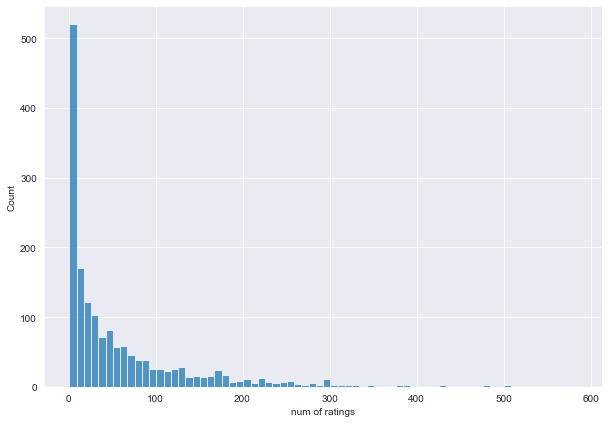

In [33]:
plt.figure(figsize = (10, 7))
sns.histplot(ratings['num of ratings'], bins = 70)

In [86]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [90]:
corr_odd 

Correlataion  num of ratings
title                                                              
'Til There Was You (1997)                 -0.426401               9
1-900 (1994)                              -0.981981               5
101 Dalmatians (1996)                     -0.043407             109
12 Angry Men (1957)                        0.178848             125
187 (1997)                                -0.554700              41
...                                             ...             ...
Young Guns (1988)                         -0.174918             101
Young Guns II (1990)                      -0.154765              44
Young Poisoner's Handbook, The (1995)     -0.341753              41
Zeus and Roxanne (1997)                   -1.000000               6
unknown                                    0.000000               9

[1312 rows x 2 columns]

In [35]:
corr_starwars.head()

Correlation  num of ratings
title                                                 
'Til There Was You (1997)     0.872872               9
1-900 (1994)                 -0.645497               5
101 Dalmatians (1996)         0.211132             109
12 Angry Men (1957)           0.184289             125
187 (1997)                    0.027398              41

we can now filter out movies with ratings below a certain threshold

In [36]:
corr_starwars[corr_starwars['num of ratings'] > 100].sort_values('Correlation', ascending = False).head()

Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   

                                                    num of ratings  
title                                                               
Star Wars (1977)                                               584  
Empire Strikes Back, The (1980)                                368  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130

In [37]:
corr_scream = corr_scream.join(ratings['num of ratings'])

In [91]:
corr_scream[corr_scream['num of ratings'] > 100].sort_values('Correlation', ascending = False).head()

Correlation  num of ratings
title                                                         
Scream (1996)                         1.000000             478
Scream 2 (1997)                       0.706028             106
Seven (Se7en) (1995)                  0.435188             236
Starship Troopers (1997)              0.419322             211
Nightmare on Elm Street, A (1984)     0.410796             111

In [96]:
corr_odd[corr_odd['num of ratings'] > 100].sort_values('Correlataion', ascending = False).head(20)

Correlataion  \
title                                                              
2001: A Space Odyssey (1968)                            1.000000   
True Romance (1993)                                     0.459189   
Natural Born Killers (1994)                             0.442248   
Being There (1979)                                      0.425009   
Dr. Strangelove or: How I Learned to Stop Worry...      0.392916   
Clockwork Orange, A (1971)                              0.388071   
Citizen Kane (1941)                                     0.370413   
Swingers (1996)                                         0.364147   
Event Horizon (1997)                                    0.341356   
Hudsucker Proxy, The (1994)                             0.335382   
Reservoir Dogs (1992)                                   0.334002   
Lawrence of Arabia (1962)                               0.331220   
Close Shave, A (1995)                                   0.329304   
Chinatown (1974)                                        0.327911   
People vs. Larry Flynt, The (1996)                      0.327292   
Apocalypse Now (1979)                                   0.312847   
Sex, Lies, and Videotape (1989)                         0.308270   
Birds, The (1963)                                       0.306531   
Godfather, The (1972)                                   0.305717   
Fargo (1996)                                            0.299882   

                                                    num of ratings  
title                                                               
2001: A Space Odyssey (1968)                                   259  
True Romance (1993)                                            104  
Natural Born Killers (1994)                                    128  
Being There (1979)                                             116  
Dr. Strangelove or: How I Learned to Stop Worry...             194  
Clockwork Orange, A (1971)                                     221  
Citizen Kane (1941)                                            198  
Swingers (1996)                                                157  
Event Horizon (1997)                                           127  
Hudsucker Proxy, The (1994)                                    110  
Reservoir Dogs (1992)                                          148  
Lawrence of Arabia (1962)                                      173  
Close Shave, A (1995)                                          112  
Chinatown (1974)                                               147  
People vs. Larry Flynt, The (1996)                             215  
Apocalypse Now (1979)                                          221  
Sex, Lies, and Videotape (1989)                                101  
Birds, The (1963)                                              162  
Godfather, The (1972)                                          413  
Fargo (1996)                                                   508

In [39]:
df[(df['title'].apply(lambda x: x.split(' ')))]

TypeError: unhashable type: 'list'

In [40]:
df['title'].apply(lambda x: x.split(' '))

0                                      [Star, Wars, (1977)]
1                                      [Star, Wars, (1977)]
2                                      [Star, Wars, (1977)]
3                                      [Star, Wars, (1977)]
4                                      [Star, Wars, (1977)]
                                ...                        
99998                                 [Mamma, Roma, (1962)]
99999                           [Eighth, Day,, The, (1996)]
100000                                [Girls, Town, (1996)]
100001    [Silence, of, the, Palace,, The, (Saimt, el, Q...
100002                                   [Dadetown, (1995)]
Name: title, Length: 100003, dtype: object

In [41]:
movMat.columns

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='title', length=1664)

In [42]:
df['title'].apply(lambda x: x.split(' ')).str.extract('(1977)')

0
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
...     ...
99998   NaN
99999   NaN
100000  NaN
100001  NaN
100002  NaN

[100003 rows x 1 columns]

In [43]:
movLst = df['title'].apply(lambda x: x.split(' '));
len(movLst)

100003

In [44]:
df['title'].apply(lambda x: x.split(' ')).values

array([list(['Star', 'Wars', '(1977)']), list(['Star', 'Wars', '(1977)']),
       list(['Star', 'Wars', '(1977)']), ...,
       list(['Girls', 'Town', '(1996)']),
       list(['Silence', 'of', 'the', 'Palace,', 'The', '(Saimt', 'el', 'Qusur)', '(1994)']),
       list(['Dadetown', '(1995)'])], dtype=object)

In [45]:
pd.DataFrame(df.values[:, 4])

0
0                                        Star Wars (1977)
1                                        Star Wars (1977)
2                                        Star Wars (1977)
3                                        Star Wars (1977)
4                                        Star Wars (1977)
...                                                   ...
99998                                   Mamma Roma (1962)
99999                              Eighth Day, The (1996)
100000                                  Girls Town (1996)
100001  Silence of the Palace, The (Saimt el Qusur) (1...
100002                                    Dadetown (1995)

[100003 rows x 1 columns]

In [46]:
df.values[:, 4]

array(['Star Wars (1977)', 'Star Wars (1977)', 'Star Wars (1977)', ...,
       'Girls Town (1996)',
       'Silence of the Palace, The (Saimt el Qusur) (1994)',
       'Dadetown (1995)'], dtype=object)

In [47]:
df[df['title'].str.contains('1977')]['title'].unique()

array(['Star Wars (1977)', 'Annie Hall (1977)', "Pete's Dragon (1977)",
       'Audrey Rose (1977)'], dtype=object)